# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [26]:
# your code here

result = []
for i in range(10):
    dice = random.randint(1,6)
    result.append(dice)
    
result_df = pd.DataFrame(result)
result_df = result_df.rename(columns={0:"results"})


In [33]:
result_df.dtypes

results    int64
dtype: object

#### 2.- Plot the results sorted by value.

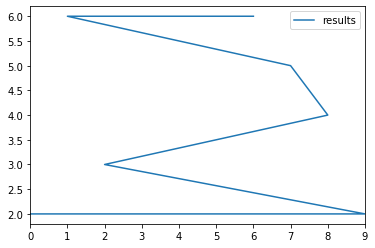

In [45]:
# your code here
result_df = result_df.sort_values(by='results')
result_df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234155B2C88>]],
      dtype=object)

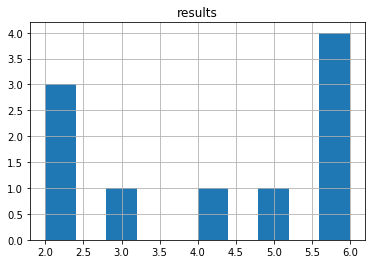

In [65]:
# your code here
result_df.hist()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [182]:
# your code here
def avg(result_df):
    return result_df.sum()/len(result_df)

In [56]:
avg(result_df)

results    4.2
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [69]:
# your code here
freq_dist = pd.DataFrame(result_df['results'].value_counts().sort_values()).rename(columns={"results":"freq"})
avg(freq_dist)


freq    2.0
dtype: float64

In [75]:
freq_dist

freq
5     1
4     1
3     1
2     3
6     4

In [96]:
freq_dist["freq"].iloc[3]
lenght = len(freq_dist)/2+0.5
position = int(((len(freq_dist)/2)+0.5)-1)
print(position)

2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [99]:
def median(freq_dist):
    if len(freq_dist) % 2 == 0:
        position_1 = int((len(freq_dist)/2+1))
        position_2 = int(len(freq_dist)/2)
    
        result_1 = freq_dist["freq"].iloc[position_1]
        result_2 = freq_dist["freq"].iloc[position_2]
    
        median = (result_1+result_2)/2
    
    elif len(freq_dist) % 2 != 0:
        position = int(((len(freq_dist)/2)+0.5)-1)
        median = freq_dist["freq"].iloc[position]
    
        return median

In [100]:
# your code here
median(freq_dist)

1

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [132]:
# your code here

def first_quart(freq_dist):
    if (len(freq_dist)*0.25) % 1 == 0.5:
        first_position = int(len(freq_dist)*0.25)-1
        second_position = int(len(freq_dist)*0.25)
    
        result_1 = freq_dist["freq"].iloc[first_position]
        result_2 = freq_dist["freq"].iloc[second_position]
    
        first_quar = (result_1+result_2)/2
    
    elif (len(freq_dist)*0.25) % 1 != 0.5:
        position = int(len(freq_dist)*0.25)-1
        
        first_quar = freq_dist["freq"].iloc[position]
    
        return first_quar

def third_quart(freq_dist):
    if (len(freq_dist)*0.75) % 1 == 0.5:
        first_position = int(len(freq_dist)*0.75)+1
        second_position = int(len(freq_dist)*0.75)+2
    
        result_1 = freq_dist["freq"].iloc[first_position]
        result_2 = freq_dist["freq"].iloc[second_position]
    
        third_quar = (result_1+result_2)/2
    
    elif (len(freq_dist)*0.75) % 1 != 0.5:
        position = int(len(freq_dist)*0.75)+1
        
        third_quar = freq_dist["freq"].iloc[position]
    
        return third_quar


In [134]:
first = first_quart(freq_dist)
med = median(freq_dist)
third = third_quart(freq_dist)

def quartiles(freq_dist):
    return print("First quartile is {}, median is {} and third quartile is {}".format(first,med,third))

In [135]:
quartiles(freq_dist)

First quartile is 1, median is 1 and third quartile is 4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [206]:
roll_100 = pd.read_csv(r"C:\Users\CLAUDIOCLEMENTE\Bootcamp\dataV2-labs\module-2\Understanding-Descriptive-Stats\data\roll_the_dice_hundred.csv")

In [207]:
roll_100

Unnamed: 0  roll  value
0            0     0      1
1            1     1      2
2            2     2      6
3            3     3      1
4            4     4      6
..         ...   ...    ...
95          95    95      4
96          96    96      6
97          97    97      1
98          98    98      3
99          99    99      6

[100 rows x 3 columns]

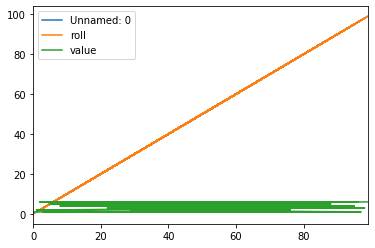

In [208]:
# your code here
roll_100 = roll_100.sort_values(by='value')
roll_100.plot()

In [ ]:
"""
As in the previous case, the value 1 does not appear
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [209]:
# your code here
avg(roll_100)

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [210]:
# your code here
freq_dist_100 = pd.DataFrame(roll_100['value'].value_counts().sort_values()).rename(columns={"results":"freq"})
freq_dist_100

value
5     12
1     12
3     14
2     17
4     22
6     23

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

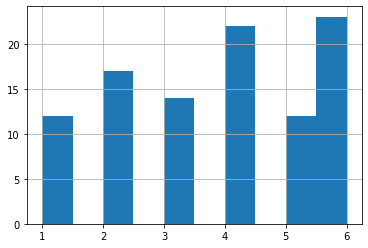

In [212]:
# your code here
roll_100["value"].hist()

In [ ]:
"""
In a roll of dice, all the outcomes have an equal probability. However, in this case, the nb \
of high results (>3) seems higher than the others, thus explaining the 3.74 (vs 3.5)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

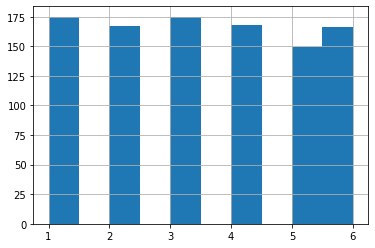

In [215]:
# your code here
roll_1000 = pd.read_csv(r"C:\Users\CLAUDIOCLEMENTE\Bootcamp\dataV2-labs\module-2\Understanding-Descriptive-Stats\data\roll_the_dice_thousand.csv")
roll_1000["value"].hist()

In [ ]:
"""
The sample with more rolls seems to have a distribution more for which each outcome has the \
same frequency. The more rolls we have the closer our result will be to a uniform distribution
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023415D72A88>]],
      dtype=object)

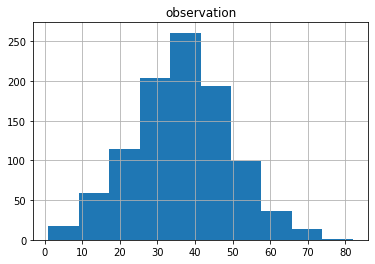

In [142]:
# your code here
population = pd.read_csv(r"C:\Users\CLAUDIOCLEMENTE\Bootcamp\dataV2-labs\module-2\Understanding-Descriptive-Stats\data\ages_population.csv")
population.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [146]:
# your code here
avg = population.mean()
std = population.std()

print(avg)
print(std)

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
They are in line. The frequency distribution seems normammy distributed
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023415EEED88>]],
      dtype=object)

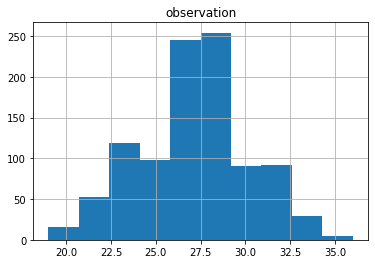

In [150]:
# your code here
population_2 = pd.read_csv(r"C:\Users\CLAUDIOCLEMENTE\Bootcamp\dataV2-labs\module-2\Understanding-Descriptive-Stats\data\ages_population2.csv")
population_2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The distrbution also seems to be normammy distributed though more concentrated around the avg.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [151]:
# your code here
avg_2 = population_2.mean()
std_2 = population_2.std()

print(avg_2)
print(std_2)

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
Since the distribution is more concentrated around the avg, the st. dev. is lower
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023415EDEC88>]],
      dtype=object)

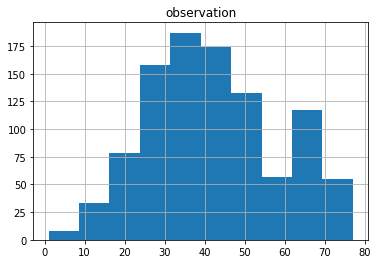

In [152]:
# your code here
population_3 = pd.read_csv(r"C:\Users\CLAUDIOCLEMENTE\Bootcamp\dataV2-labs\module-2\Understanding-Descriptive-Stats\data\ages_population3.csv")
population_3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [153]:
# your code here
avg_3 = population_3.mean()
std_3 = population_3.std()

print(avg_3)
print(std_3)

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
The avg. is higher as the distribution seems to be right skewed
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [159]:
population_3

observation
0           21.0
1           21.0
2           24.0
3           31.0
4           54.0
..           ...
995         16.0
996         55.0
997         30.0
998         35.0
999         43.0

[1000 rows x 1 columns]

In [162]:
# your code here
Q1 = population_3.quantile(0.25)
med = population_3.median()
Q3 = population_3.quantile(0.75)

print(avg_3)
print(med)

observation    41.989
dtype: float64
observation    40.0
dtype: float64


In [160]:
"""
The fact that mean > median confirms that the distribution is right skewed
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [166]:
# your code here
Q80 = population_3.quantile(0.80)
Q100 = population_3.quantile(1)

Q20 = population_3.quantile(0.20)
Q1 = population_3.quantile(0.00)

print(Q100-Q80)
print(Q20-Q1)


observation    20.0
dtype: float64
observation    27.0
dtype: float64
observation    1.0
dtype: float64


In [ ]:
"""
The range beween the 80th quantile and the max is more concentrated that the range between min and the 20th quantile
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""